<a href="https://colab.research.google.com/github/SPageot/pytorch-test/blob/main/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

List

In [141]:
my_list = [[1,2,3,4,5],[6,7,8,9,10]]
my_list

[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]

Numpy Arrays

In [142]:
np1 = np.random.rand(3,4)
np1

array([[0.01291905, 0.11211679, 0.28464442, 0.23017583],
       [0.60658317, 0.36834923, 0.91911886, 0.06856904],
       [0.67991088, 0.00860868, 0.14377461, 0.28489402]])

In [143]:
np1.dtype

dtype('float64')

Tensor

In [144]:
tensor_2d = torch.randn(3,4)
tensor_2d

tensor([[-0.0203,  0.1082,  0.9384,  0.4005],
        [ 1.0729, -1.7529, -0.9982,  0.1582],
        [-1.6172,  0.6904,  0.9998, -2.5733]])

In [145]:
tensor_3d = torch.zeros(2,3,4)
tensor_3d

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [146]:
my_tensor = torch.tensor(np1)
my_tensor

tensor([[0.0129, 0.1121, 0.2846, 0.2302],
        [0.6066, 0.3683, 0.9191, 0.0686],
        [0.6799, 0.0086, 0.1438, 0.2849]], dtype=torch.float64)

Tensor Range


In [147]:
my_torch = torch.arange(10)
my_torch

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Tensor Reshape

In [148]:
my_torch = my_torch.reshape(2,5)
my_torch

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [149]:
my_torch2 = torch.arange(15)
my_torch2

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [150]:
my_torch2 = my_torch2.reshape(3,-1)
my_torch2

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]])

Tensor View

In [151]:
my_torch3 = torch.arange(10)
my_torch3

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [152]:
my_torch4 = my_torch3.view(2,5)
my_torch4

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [153]:
my_torch5 = torch.arange(10)
my_torch5

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [154]:
my_torch6 = my_torch5.reshape(2,5)
my_torch6

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [155]:
my_torch5[1] = 13
my_torch5

tensor([ 0, 13,  2,  3,  4,  5,  6,  7,  8,  9])

In [156]:
my_torch6

tensor([[ 0, 13,  2,  3,  4],
        [ 5,  6,  7,  8,  9]])

Simple Neural Network

In [157]:
class Model(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x



In [158]:
torch.manual_seed(42)
model = Model()

In [159]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Read Raw Data with Pandas

In [160]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)

In [161]:
df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


Change variety names to numbers

In [162]:
df['variety'] = df['variety'].replace('Setosa', 0)
df['variety'] = df['variety'].replace('Versicolor', 1)
df['variety'] = df['variety'].replace('Virginica', 2)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Train Test Split

In [163]:
X = df.drop('variety', axis=1)
y = df['variety']

In [164]:
X = X.values
y = y.values

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) #test size is 20% and training is 80%

Convert X features to float tensors

In [167]:
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)

Convert y labels to tensors long

In [168]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

Set the Criterion of model to measure error, how far off are the predictions

In [169]:
criterion = nn.CrossEntropyLoss()


Choose Optimizer

In [170]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) #lowering the lr(learning rate) will increase the time it takes for it to learn

In [171]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

Train our Model

Epoch (One run through all the training data in our network)

In [172]:
epochs = 100
losses = []

Do Back Propagation: As we get an error, we feed it back to the network to learn better

In [173]:
for i in range(epochs):
  y_pred = model.forward(X_train) # get predicted results
  loss = criterion(y_pred, y_train) # measure losses/ predicted values vs the y_train
  losses.append(loss.detach().numpy()) # keep track of our losses
  if i % 10 == 0:
    print(f'Epoch:{i} and loss: {loss}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch:0 and loss: 1.0846974849700928
Epoch:10 and loss: 0.9178672432899475
Epoch:20 and loss: 0.7620365023612976
Epoch:30 and loss: 0.6275593638420105
Epoch:40 and loss: 0.4669331908226013
Epoch:50 and loss: 0.28769081830978394
Epoch:60 and loss: 0.16747026145458221
Epoch:70 and loss: 0.10634331405162811
Epoch:80 and loss: 0.08051122725009918
Epoch:90 and loss: 0.06965289264917374


Graphing the Errors

Text(0.5, 0, 'Epoch')

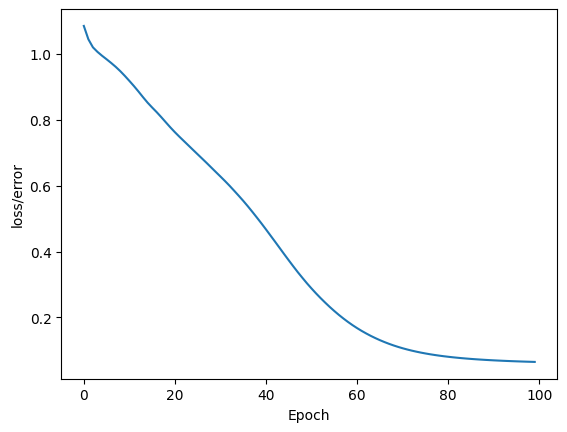

In [174]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

In [175]:
with torch.no_grad(): # Turns off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be our predictions
  loss = criterion(y_eval, y_test) # Find the loss

In [176]:
loss

tensor(0.0638)

In [177]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct')

1.) tensor([-1.4047,  6.3088,  2.6059]) 	 1 	 1
2.) tensor([ 8.3873,  2.4565, -7.5105]) 	 0 	 0
3.) tensor([-12.1550,   1.2180,  13.7084]) 	 2 	 2
4.) tensor([-1.6694,  5.9208,  2.8609]) 	 1 	 1
5.) tensor([-1.5830,  6.7488,  2.8363]) 	 1 	 1
6.) tensor([ 7.8355,  2.3252, -6.9788]) 	 0 	 0
7.) tensor([ 1.1226,  6.0539, -0.0397]) 	 1 	 1
8.) tensor([-5.1951,  4.4495,  6.5238]) 	 2 	 2
9.) tensor([-3.2498,  4.9141,  4.4721]) 	 1 	 1
10.) tensor([0.5643, 6.5383, 0.5529]) 	 1 	 1
11.) tensor([-4.3360,  4.7788,  5.6267]) 	 2 	 2
12.) tensor([ 7.3510,  2.0547, -6.5259]) 	 0 	 0
13.) tensor([ 8.1241,  2.3544, -7.2604]) 	 0 	 0
14.) tensor([ 7.4812,  2.1052, -6.6496]) 	 0 	 0
15.) tensor([ 7.8507,  2.2484, -7.0006]) 	 0 	 0
16.) tensor([-1.3284,  6.5228,  2.5457]) 	 1 	 1
17.) tensor([-8.2425,  2.4429,  9.6183]) 	 2 	 2
18.) tensor([0.3340, 6.4646, 0.7730]) 	 1 	 1
19.) tensor([-1.5835,  5.7637,  2.7534]) 	 1 	 1
20.) tensor([-8.1610,  2.2921,  9.5194]) 	 2 	 2
21.) tensor([ 7.2355,  2.0783, -

In [178]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [179]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 7.2972,  2.0339, -6.4748])


In [180]:
newer_iris = torch.tensor([6.5,	3.0, 5.2, 2.0	])

In [181]:
with torch.no_grad():
  print(model(newer_iris))

tensor([-5.2394,  4.1932,  6.5459])


Save  our NN Model

In [183]:
torch.save(model.state_dict(), 'Flower Detector.pt')

Load our NN Model

In [184]:
new_model = Model()
new_model.load_state_dict(torch.load('Flower Detector.pt'))

<All keys matched successfully>

Check Load

In [186]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)